# Volume 4: Animation
    Daniel Perkins
    MATH 437
    7/30/24

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [88]:
animation.writer = animation.writers['ffmpeg']

## Problem 1

Use the FuncAnimation class to animate the function $y = \sin(x + 3t)$ where $x \in [0, 2\pi]$, and t ranges from 0 to 10 seconds.
Embed your animation into the notebook.

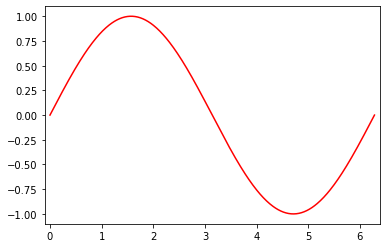

In [89]:
xs = np.linspace(0, 2*np.pi, 500)
ts = np.linspace(0, 10, 500)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([-.1, 2*np.pi+.1])
plt.ylim([-1.1, 1.1])

# Create an empty line object
line, = ax.plot([], [], 'r-')

# Create a function to update line objects
def update(t):
    line.set_data(xs, np.sin(xs + 3*t))
    
interval = np.ceil(1000 * (10 - 0) / (500))  # Set interval so that the timing is correct
ani = FuncAnimation(fig, update, frames=ts, interval=interval)  # Create animation object


In [90]:
ani.save('sine_animation.mp4')

<video src="sine_animation.mp4" controls>

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the planet orbits, the starting positions of each planet as a point, and the position of the sun as a point, and compare your results with Figure 1.1. Make sure to include a legend. 

As you work through the next few problems, it may be helpful to use a for loop and/or dictionaries to plot each of the planets.

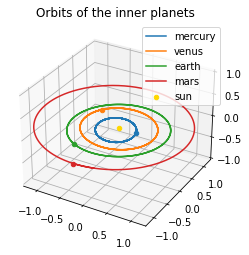

In [91]:
data = np.load("orbits.npz")

xs = np.linspace(-.5,.5, 500)
ys = np.linspace(-.5,.5, 500)
zs = np.linspace(-.5,.5, 500)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.25,1.25)
ax.set_ylim(-1.25,1.25)
ax.set_zlim3d(-1, 1)

# Plot each planet
for planet in ["mercury", "venus", "earth", "mars"]:
    ax.plot(data[planet][:,0], data[planet][:,1], data[planet][:,2], label=planet)  # Plot orbit
    ax.scatter(data[planet][0,0], data[planet][0,1], data[planet][0,2])   # Starting location
ax.scatter(0, 0, 0, label="sun", color="gold")  # The sun
plt.title("Orbits of the inner planets")
plt.legend(loc="upper right")

plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the sun and current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Include a legend, and embed your animation in the notebook.

Text(0.5, 0.92, 'Orbit of the inner planets')

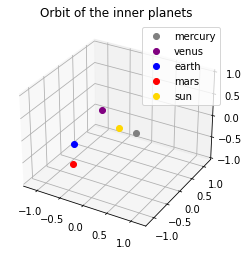

In [92]:
data = np.load("orbits.npz")

xs = np.linspace(-.5,.5, 500)
ys = np.linspace(-.5,.5, 500)
zs = np.linspace(-.5,.5, 500)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.25,1.25)
ax.set_ylim(-1.25,1.25)
ax.set_zlim3d(-1, 1)

# Create an empty line object
line, = ax.plot([], [], [], c="grey")
dot, = ax.plot([], [], [], 'o', c="grey", label="mercury")  # Place dot at end
line2, = ax.plot([], [], [], c="purple")
dot2, = ax.plot([], [], [], 'o', c="purple", label="venus")  # Place dot at end
line3, = ax.plot([], [], [], c="blue")
dot3, = ax.plot([], [], [], 'o', c="blue", label="earth")  # Place dot at end
line4, = ax.plot([], [], [], c="red")
dot4, = ax.plot([], [], [], 'o', c="red", label="mars")  # Place dot at end
dot5, = ax.plot([], [], [], 'o', c="gold", label="sun")  # Sun

# Create a function to update line objects
def update(t):
    line.set_data_3d(data["mercury"][:t,0], data["mercury"][:t,1], data["mercury"][:t,2])  # Line is everything up to the point
    dot.set_data_3d(data["mercury"][t, 0], data["mercury"][t, 1], data["mercury"][t, 2])
    line2.set_data_3d(data["venus"][:t,0], data["venus"][:t,1], data["venus"][:t,2])
    dot2.set_data_3d(data["venus"][t, 0], data["venus"][t, 1], data["venus"][t, 2])
    line3.set_data_3d(data["earth"][:t,0], data["earth"][:t,1], data["earth"][:t,2])
    dot3.set_data_3d(data["earth"][t, 0], data["earth"][t, 1], data["earth"][t, 2])
    line4.set_data_3d(data["mars"][:t,0], data["mars"][:t,1], data["mars"][:t,2])
    dot4.set_data_3d(data["mars"][t, 0], data["mars"][t, 1], data["mars"][t, 2])
    dot5.set_data_3d(0, 0, 0)
    return line, dot, line2, dot2, line3, dot3, line4, dot4, dot5
    
interval = 10  # Set interval 
ani = FuncAnimation(fig, update, frames=range(1400), interval=interval)  # Create animation object
ax.legend(loc="upper right")
ax.set_title("Orbit of the inner planets")


In [93]:
ani.save('planet_animation.mp4')

<video src="planet_animation.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}\exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

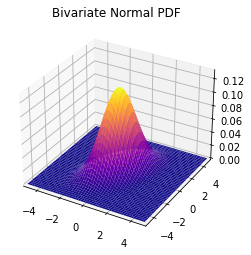

In [94]:
# Set line spaces
xs = np.linspace(-5, 5, 200)
ys = np.linspace(-5, 5, 200)
zs = np.linspace(0, 0.13, 200)
X, Y = np.meshgrid(xs, ys)

# Define f
sigma = np.array([[1., 3./5],
                  [3./5, 2.]])
inv_sigma = np.linalg.inv(sigma)
coeff = 1 / np.sqrt(np.linalg.det(2*np.pi*sigma))
mu = np.array([0,0])
def f(x, y):
    w = np.array([x, y])
    return coeff * np.exp(-.5 * (w - mu) @ inv_sigma @ (w - mu))

# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim3d(0, 0.13)

# Find values for the output
Z = np.zeros_like(X)
for i in range(len(xs)):
    for j in range(len(ys)):
        Z[i,j] = f(X[i,j], Y[i,j])

# Plot it
ax.set_title("Bivariate Normal PDF")
ax.plot_surface(X, Y, Z, cmap="plasma")
plt.show()



## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Embed the animation in the notebook.

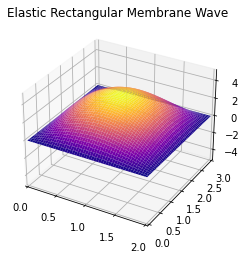

In [95]:
data = np.load("vibration.npz") # Load in the data

# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a function to update line objects
def update(t):
    ax.clear()  # Reset plot
    ax.set_xlim(0,2)
    ax.set_ylim(0,3)
    ax.set_zlim3d(-5, 5)
    ax.set_title("Elastic Rectangular Membrane Wave")
    ax.plot_surface(data["X"], data["Y"], data["Z"][t], cmap="plasma")
    
interval = 100  # Set interval so that the timing is correct
ani = FuncAnimation(fig, update, frames=range(150), interval=interval)  # Create animation object

In [96]:
ani.save('vibration_animation.mp4')

<video src="vibration_animation.mp4" controls>

### Don't forget to push your .mp4 animation files!